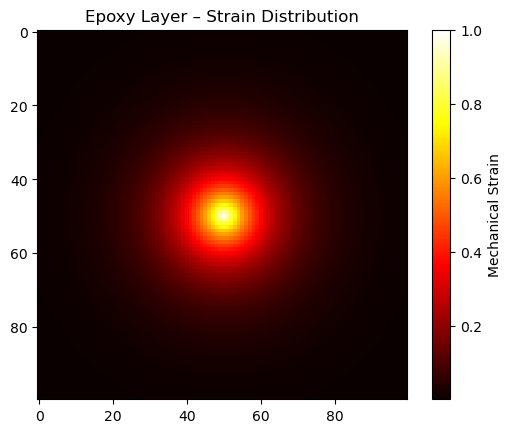

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grid (epoksi katman)
N = 100
strain = np.zeros((N, N))

# Mikroçatlak merkezi
crack_x, crack_y = 50, 50

# Gerinim dağılımı (gaussian benzeri)
for i in range(N):
    for j in range(N):
        r = np.sqrt((i-crack_x)**2 + (j-crack_y)**2)
        strain[i, j] = np.exp(-r/10)

plt.imshow(strain, cmap="hot")
plt.colorbar(label="Mechanical Strain")
plt.title("Epoxy Layer – Strain Distribution")
plt.show()

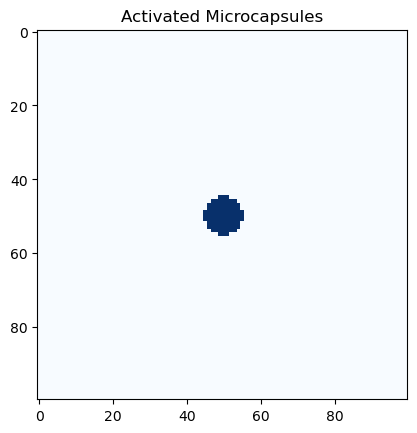

In [2]:
# Kapsül geçirgenlik eşiği
threshold = 0.6

# Başlangıçta kapsüller kapalı
permeability = np.zeros((N, N))

# Gerinim eşiği aşılırsa geçirgenlik artar
permeability[strain > threshold] = 1

plt.imshow(permeability, cmap="Blues")
plt.title("Activated Microcapsules")
plt.show()


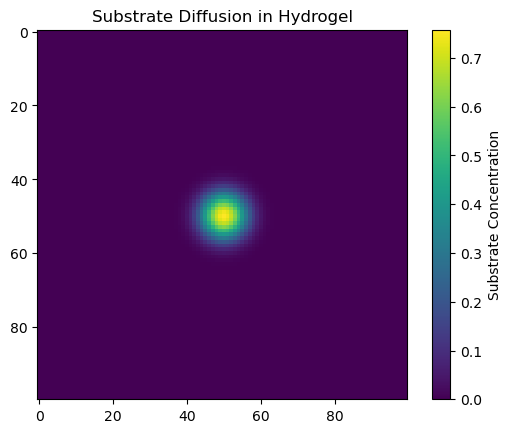

In [3]:
substrate = np.zeros((N, N))
substrate[permeability == 1] = 1  # salınım noktaları

D = 0.1  # difüzyon katsayısı
steps = 50

for _ in range(steps):
    substrate = substrate + D * (
        np.roll(substrate, 1, 0) +
        np.roll(substrate, -1, 0) +
        np.roll(substrate, 1, 1) +
        np.roll(substrate, -1, 1) -
        4 * substrate
    )

plt.imshow(substrate, cmap="viridis")
plt.colorbar(label="Substrate Concentration")
plt.title("Substrate Diffusion in Hydrogel")
plt.show()


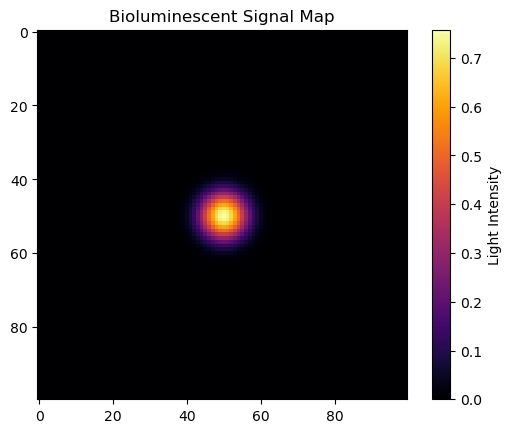

In [4]:
enzyme = np.ones((N, N))  # hidrojelde enzim var
light_intensity = enzyme * substrate

plt.imshow(light_intensity, cmap="inferno")
plt.colorbar(label="Light Intensity")
plt.title("Bioluminescent Signal Map")
plt.show()
